In [56]:
#!rm -rf code
#!git clone https://xxxx/yyyy.git code
#!mv code/* .
%load_ext autoreload
%autoreload 2
%matplotlib inline
from helpers import *
from matplotlib import pyplot as plt
import numpy as np
from experiment_datasets import *
import pandas as pd
import seaborn as sns
import pickle
from IPython.display import clear_output
import matplotlib

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Fixed single Boston experiment for all dataset as points

In [3]:
# pfailure for the first layer
p = 1e-2
np.random.seed(42)

In [48]:
repetitions = 10
Ns = np.arange(5, 200, 20)

In [49]:
def run_for_N(N = 50):
    """ Train a network with given h1 size and compute mean FT variance """
    # run with random weights and multiple inputs
    exp = BostonHousingExperiment(N = [N, 49], p_inference = [0, p, 0, 0], seed = int(np.random.random() * 100000),
                                  activation = 'sigmoid', epochs = 500, do_print = 'plot')

    # obtaining data points
    data = exp.get_inputs(50)

    # obtaining errors and bounds for data points
    rmean, rstd = exp.run(data, repetitions = 10000)

    return np.mean(rstd['experiment'])

  0%|          | 0/10 [00:00<?, ?it/s]

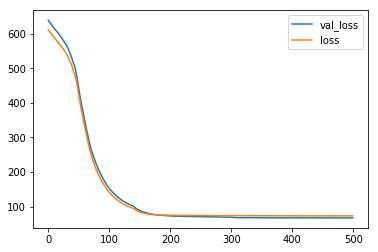

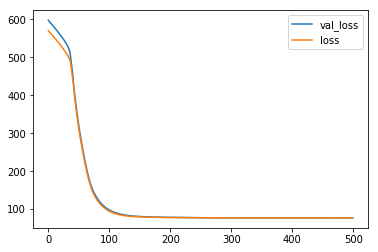

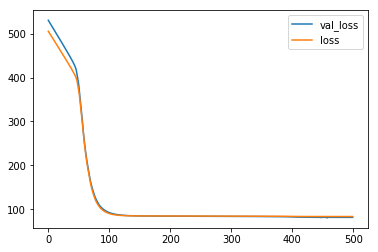

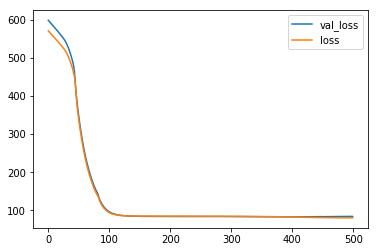

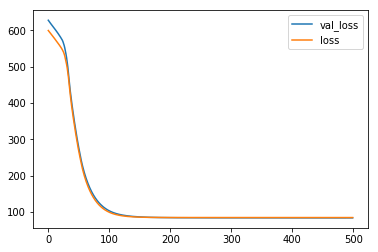

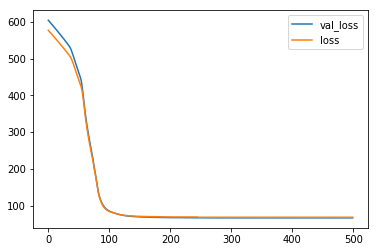

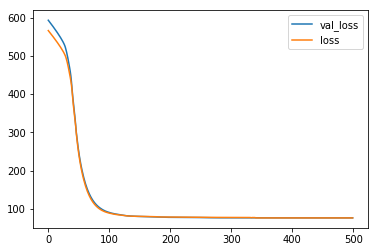

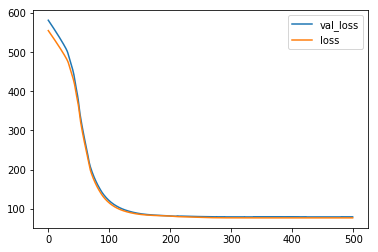

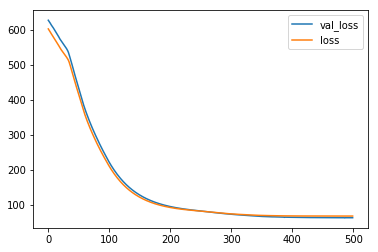

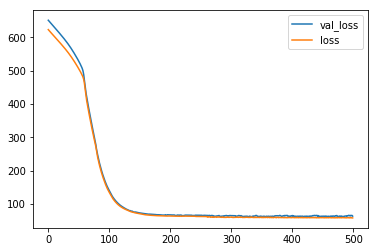

 10%|█         | 1/10 [07:45<1:09:46, 465.22s/it]

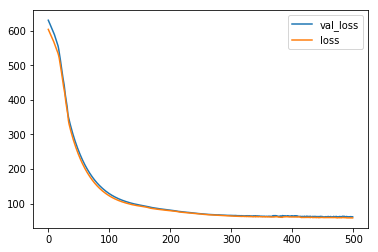

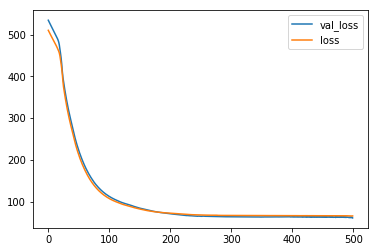

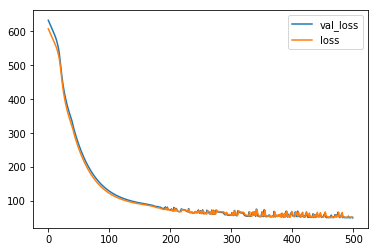

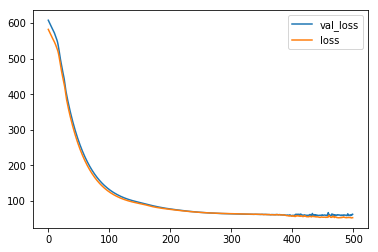

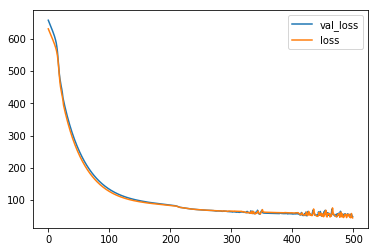

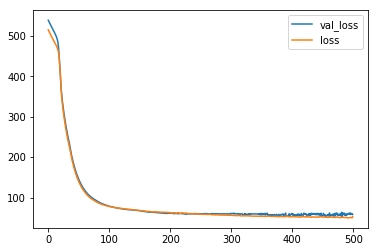

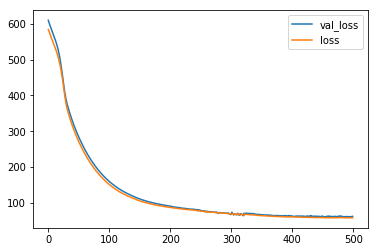

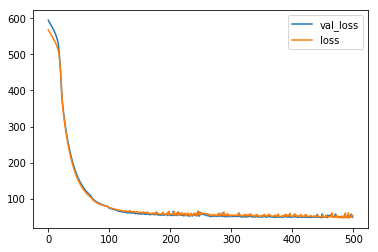

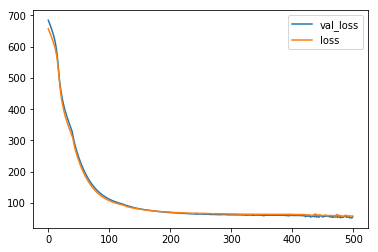

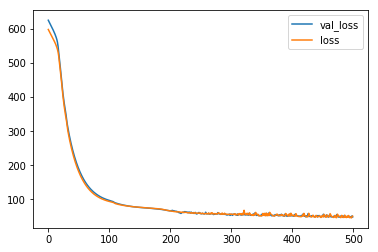

 20%|██        | 2/10 [17:11<1:06:04, 495.52s/it]

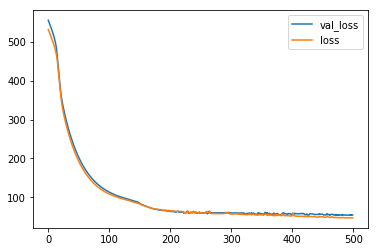

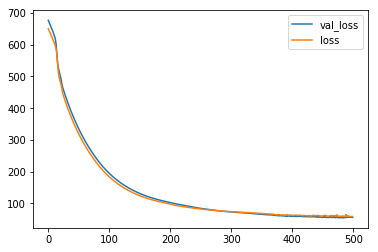

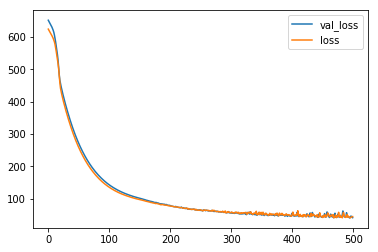

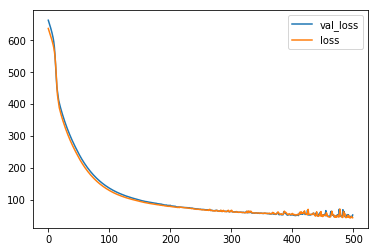

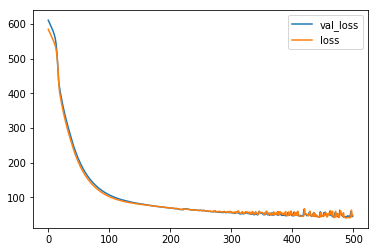

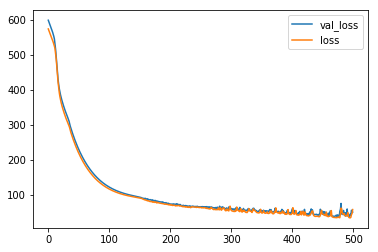

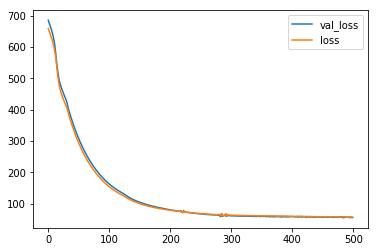

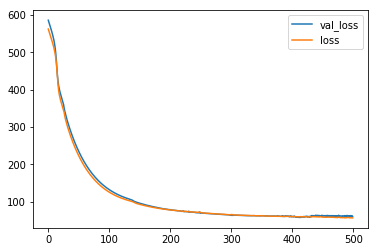

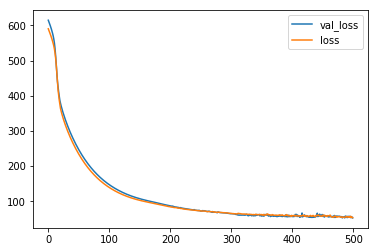

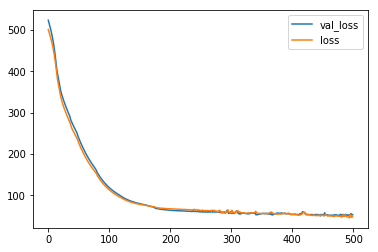

 30%|███       | 3/10 [28:30<1:04:14, 550.68s/it]

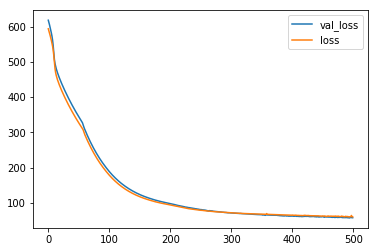

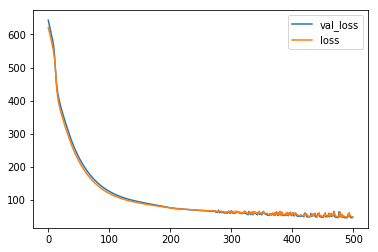

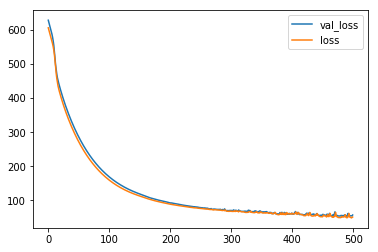

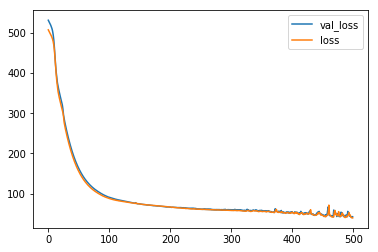

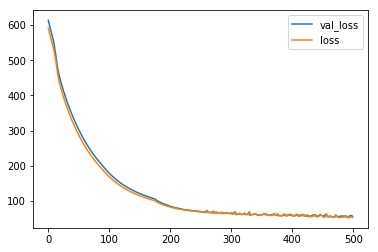

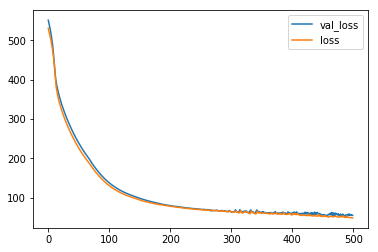

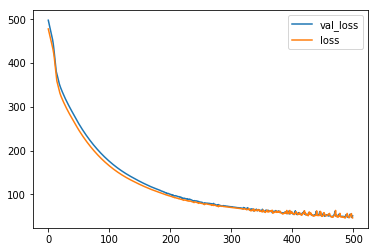

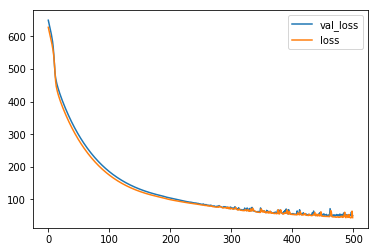

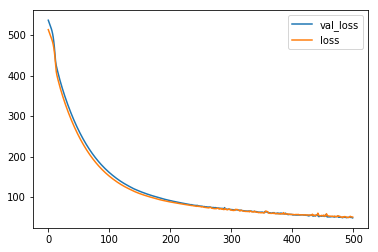

 40%|████      | 4/10 [41:53<1:02:38, 626.35s/it]

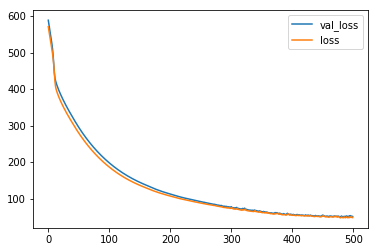

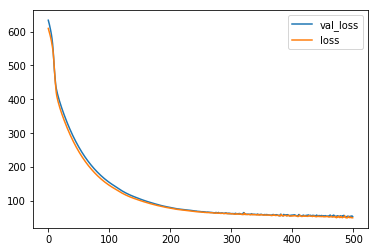

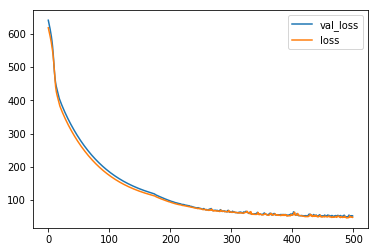

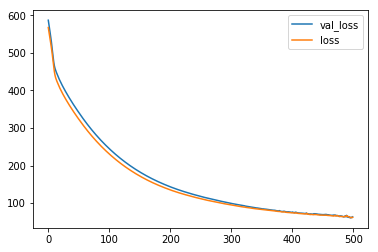

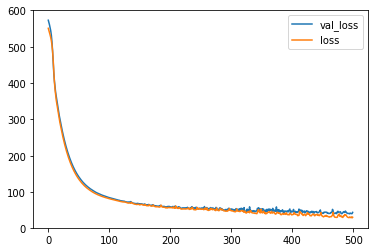

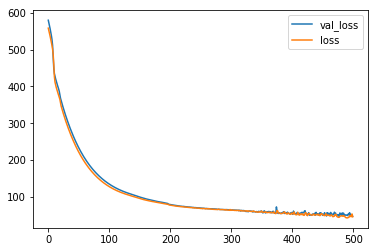

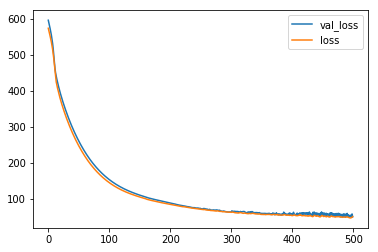

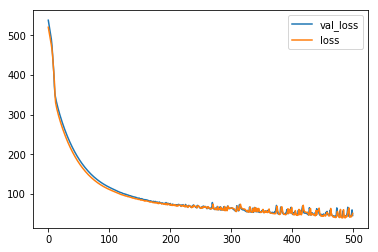

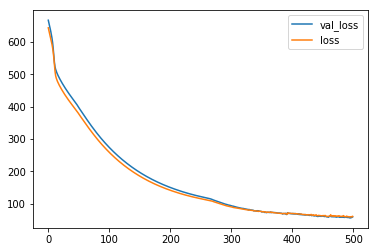

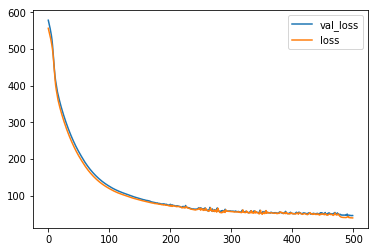

 50%|█████     | 5/10 [57:37<1:00:08, 721.62s/it]

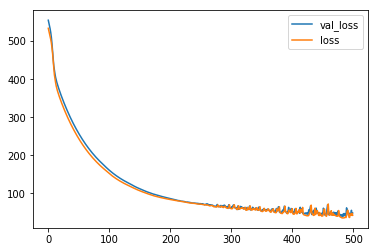

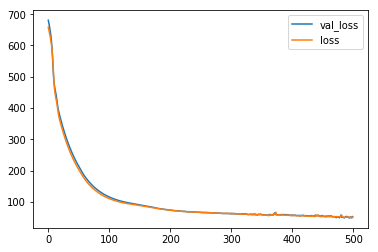

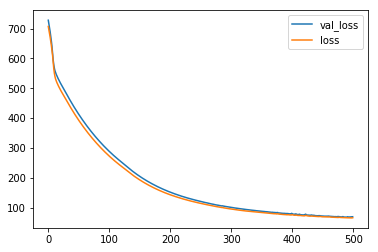

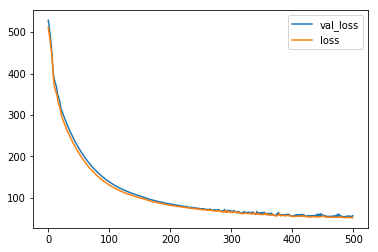

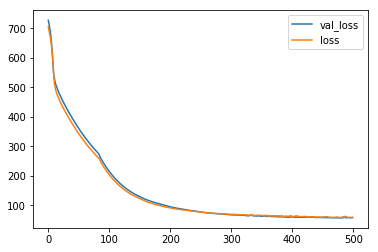

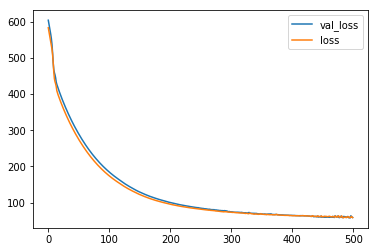

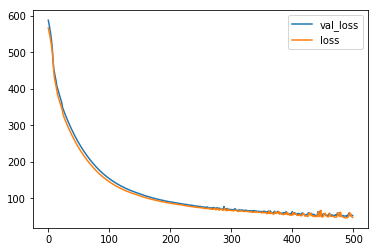

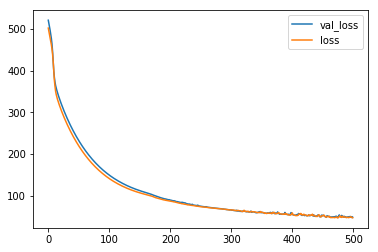

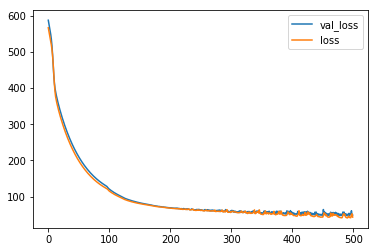

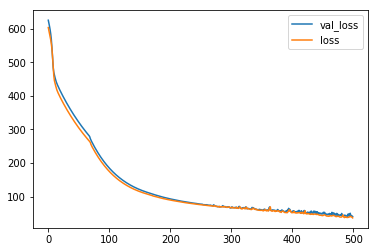

 60%|██████    | 6/10 [1:16:06<55:51, 837.84s/it]

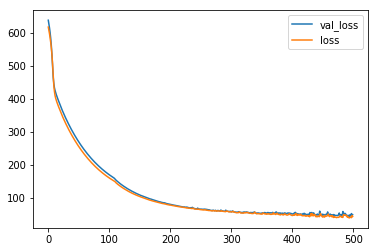

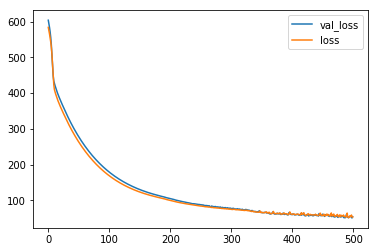

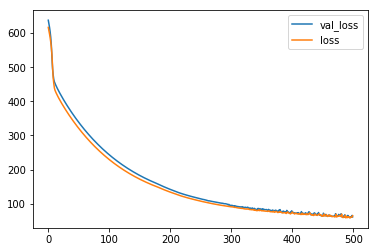

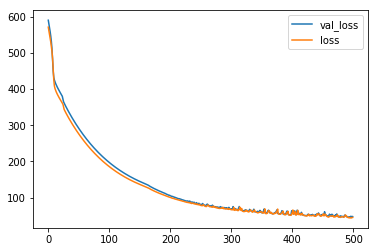

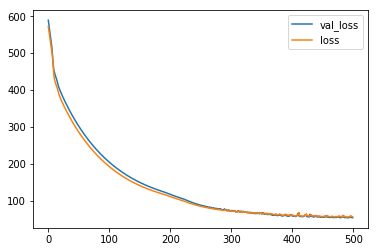

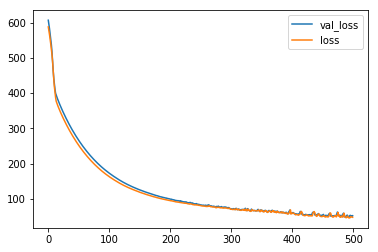

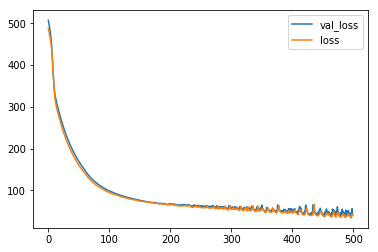

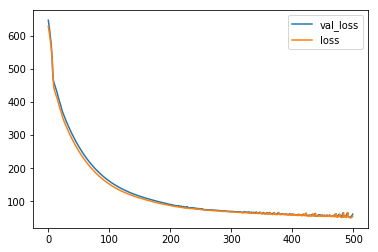

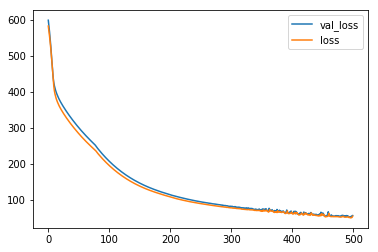

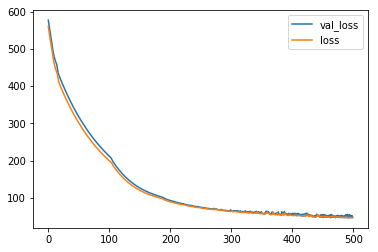

 70%|███████   | 7/10 [1:37:47<48:50, 976.87s/it]

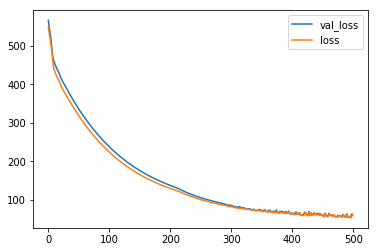

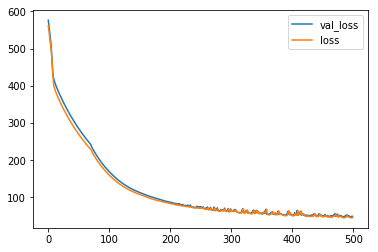

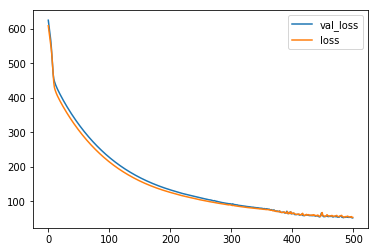

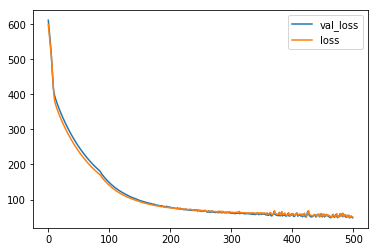

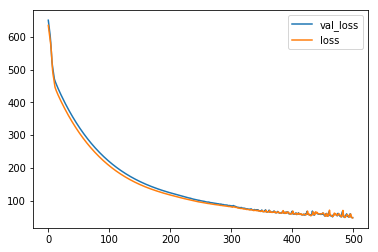

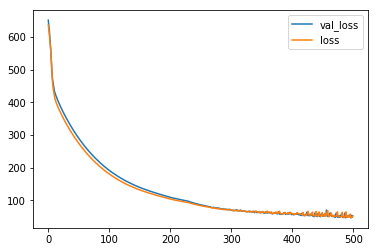

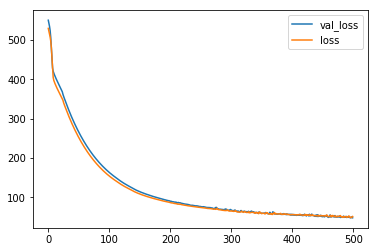

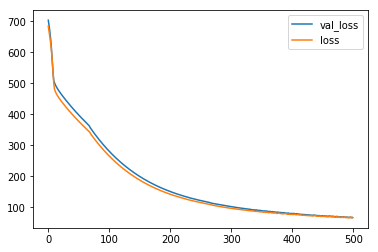

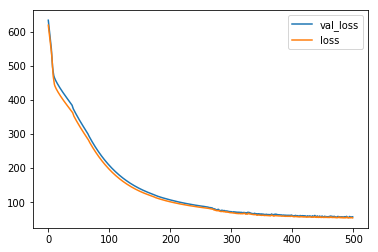

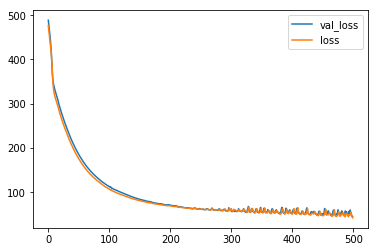

 80%|████████  | 8/10 [2:03:05<37:57, 1138.93s/it]

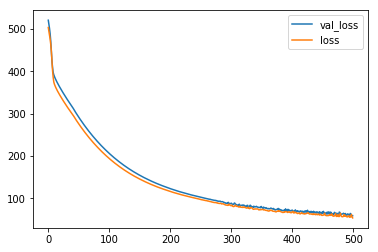

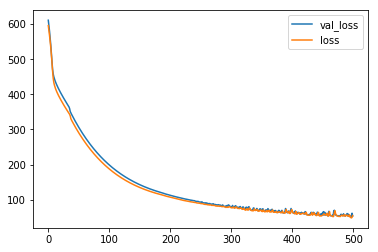

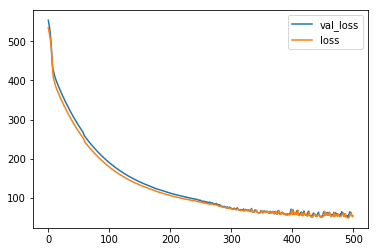

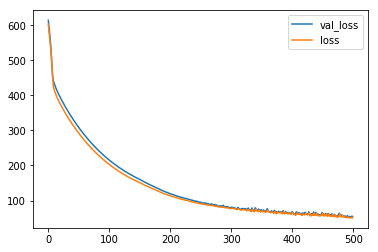

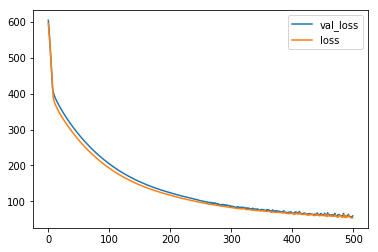

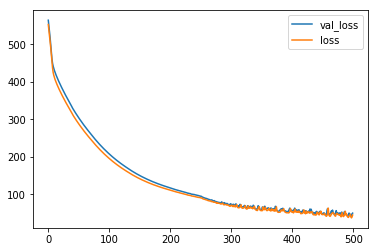

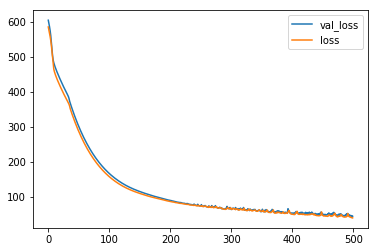

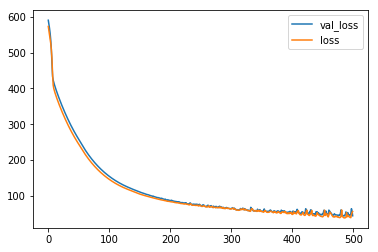

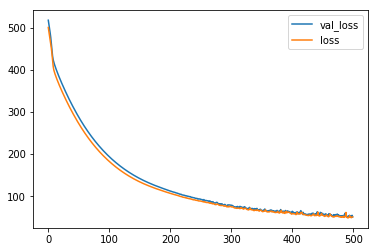

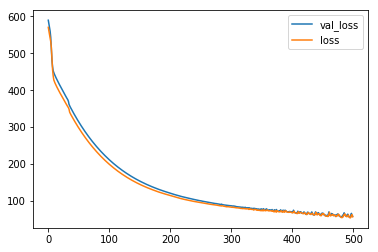

 90%|█████████ | 9/10 [2:32:14<22:02, 1322.03s/it]

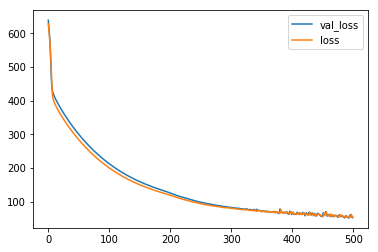

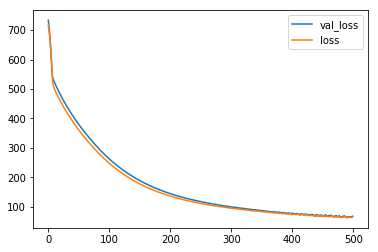

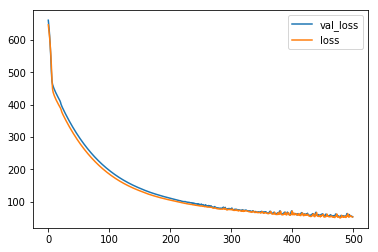

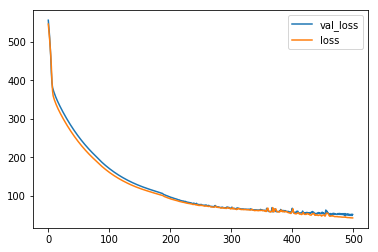

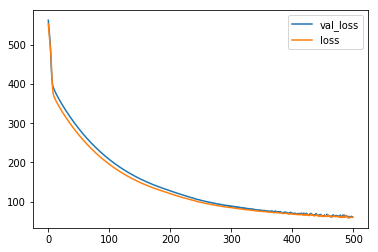

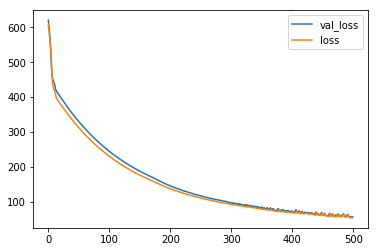

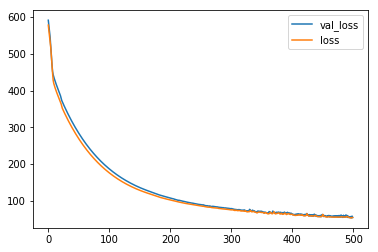

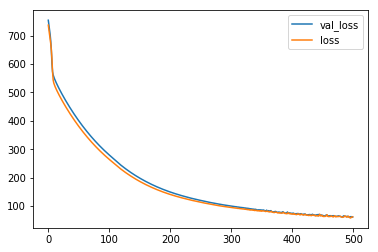

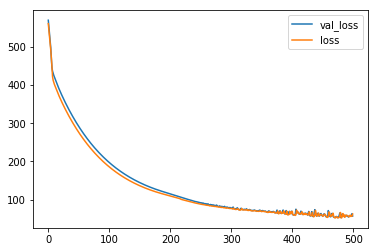

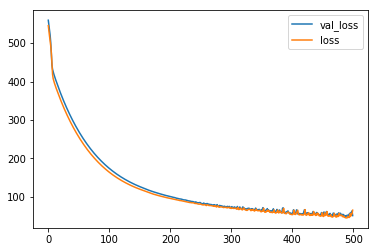

100%|██████████| 10/10 [3:05:31<00:00, 1524.51s/it]


In [50]:
results = [[run_for_N(N) for _ in range(repetitions)] for N in tqdm(Ns)]

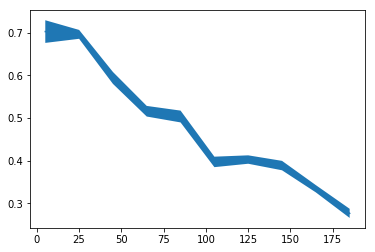

In [53]:
mean = np.mean(results, axis = 1)
std = np.std(results, axis = 1) / len(results[0])
plt.figure()
plt.plot(Ns, mean)
plt.fill_between(Ns, mean - std, mean + std)
plt.
plt.show()

In [57]:
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}
matplotlib.rc('font', **font)

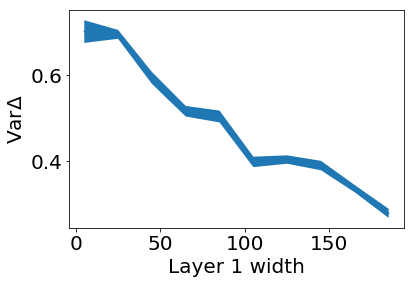

In [59]:
mean = np.mean(results, axis = 1)
std = np.std(results, axis = 1) / len(results[0])
plt.figure()
plt.xlabel('Layer 1 width')
plt.ylabel('Var$\Delta$')
plt.plot(Ns, mean)
plt.fill_between(Ns, mean - std, mean + std)
plt.savefig('figures/comparison_architecture_boston.eps', bbox_inches = 'tight')
plt.show()

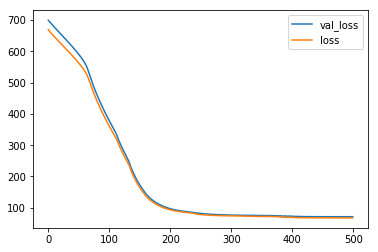

0.996722

In [26]:
run_for_N(3)

In [26]:
# obtaining data points
data = exp.get_inputs('all')

# obtaining errors and bounds for data points
rmean, rstd = exp.run(data, repetitions = 50000)

In [4]:
fn = 'ErrorComparisonBostonSingleNetwork.pkl'

In [ ]:
pickle.dump((rmean, rstd), open(fn, 'wb'))
from google.colab import files
files.download(fn)

In [5]:
rmean, rstd = pickle.load(open(fn, 'rb'))

/localhome/xxxx/miniconda3/envs/neuronfailure/lib/python3.6/site-packages/matplotlib/font_manager.py:1238: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


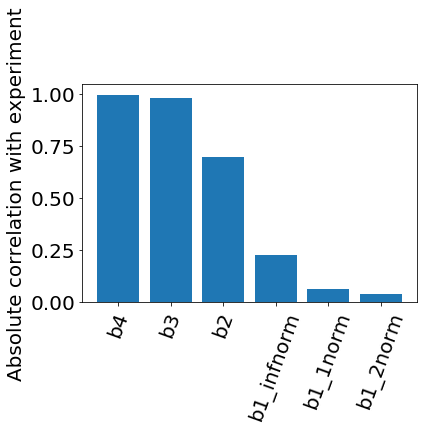

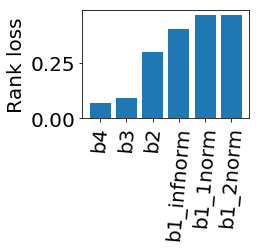

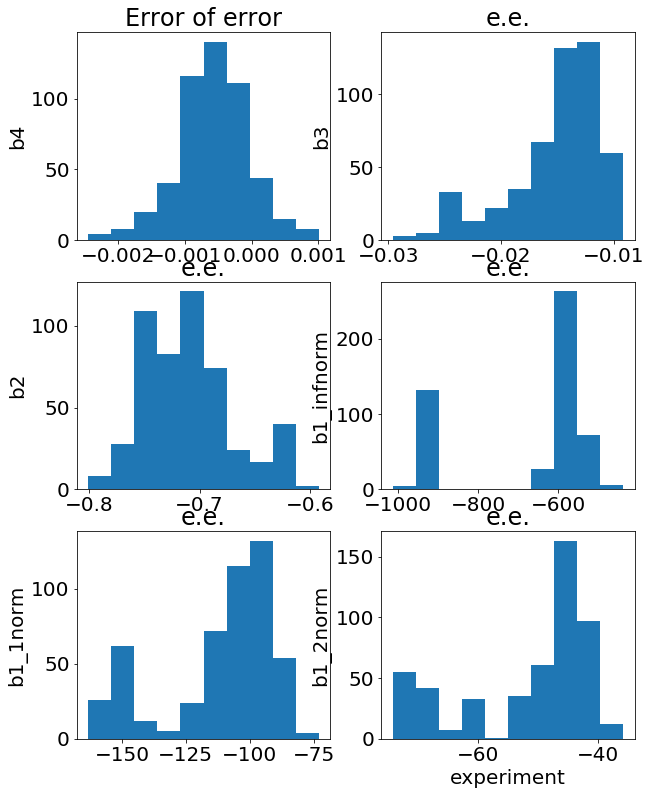

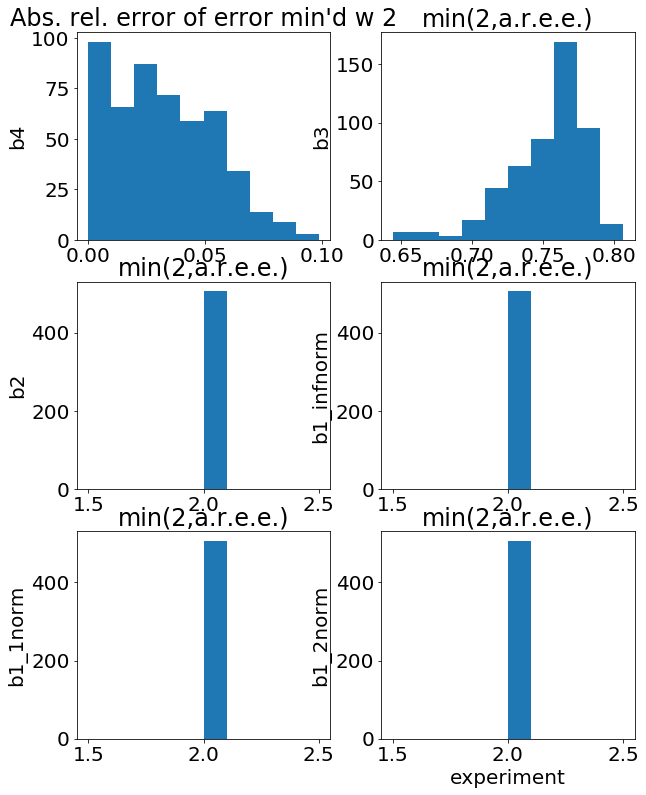

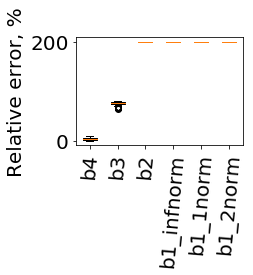

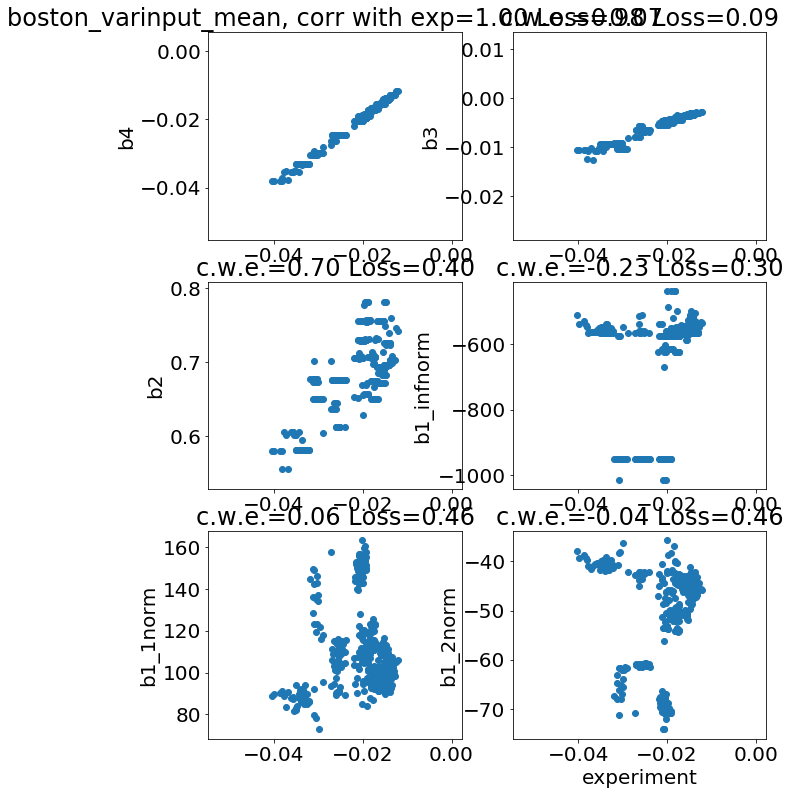

,bound,corr,rank_loss
0,b4,0.996170,0.067632
1,b3,0.978742,0.091504
2,b2,0.695423,0.400697
3,b1_infnorm,-0.227117,0.296701
4,b1_1norm,0.060191,0.463421
5,b1_2norm,-0.039521,0.461018


In [6]:
# showing results for mean
exp.process_scalar_output(rmean, 'boston_varinput_mean')

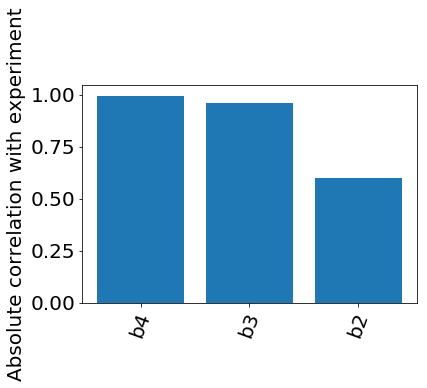

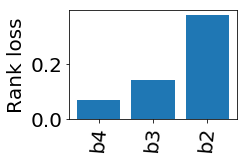

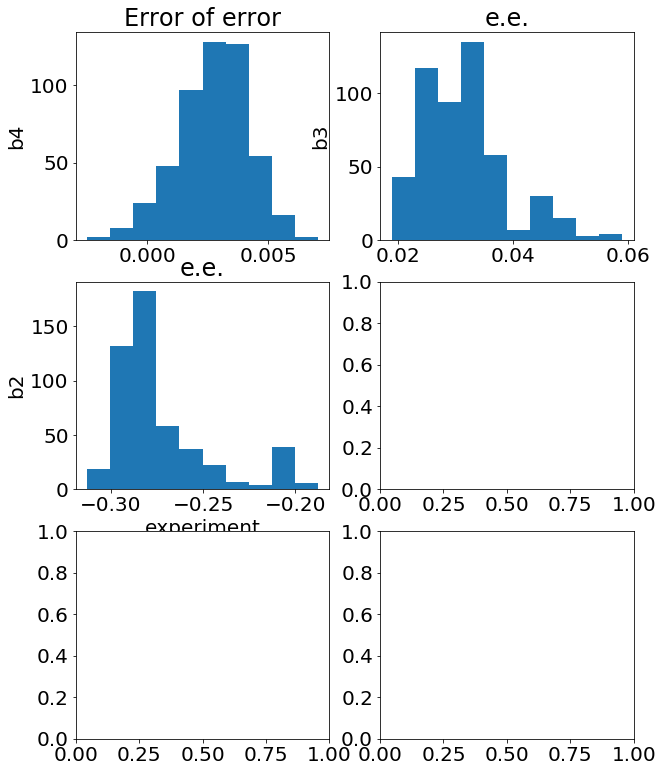

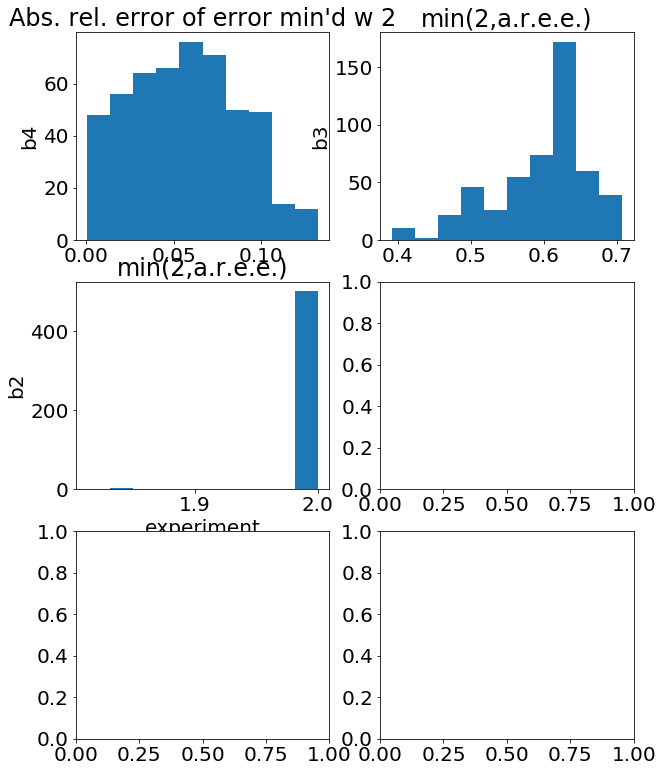

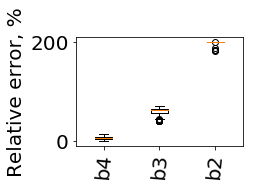

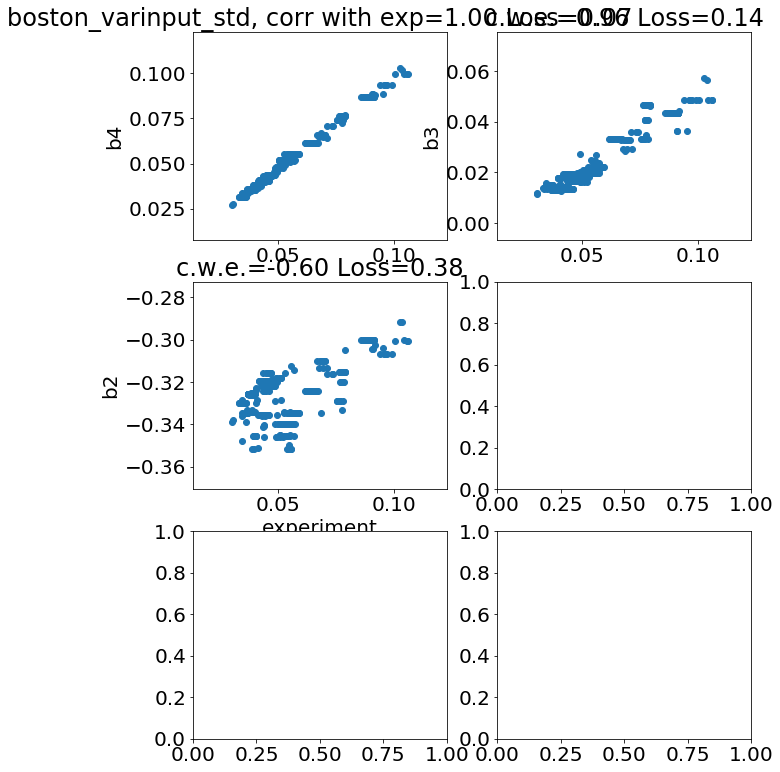

,bound,corr,rank_loss
0,b4,0.996231,0.068540
1,b3,0.958407,0.143498
2,b2,-0.600250,0.378758


In [7]:
# showing results for std
exp.process_scalar_output(rstd, 'boston_varinput_std')

### Fixing the data point and comparing different networks on it

In [8]:
# pfailure for the first layer
p = 1e-2

np.random.seed(42)

# obtaining some experiment
exp = BostonHousingExperiment(N = [50, 50], epochs = 0, p_inference = [0, p, 0, 0], activation = 'relu', do_print = True)

# input to test
data = exp.get_inputs(1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 50)                700       
_________________________________________________________________
dense_11 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 51        
Total params: 3,301
Trainable params: 3,301
Non-trainable params: 0
_________________________________________________________________
Train on 404 samples, validate on 102 samples
Creating network for 13-dimensional input and 1-dimensional output, with 2 hidden layers
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 50)                700       
_________________________________________________________________
lambd

In [29]:
# array with networks
results_mean = []
results_std = []

# looking at 50 random networks
for i in tqdm(range(20)):
    # for some reason np.random.randn inside BostonHousingExperiment always uses the same seed...
    seed = int(np.random.rand() * 10000)
    
    # run with random weights and single input
    exp = BostonHousingExperiment(N = [50, 50], epochs = 20, p_inference = [0, p, 0, 0], activation = 'relu', seed = seed)

    # obtaining data
    rmean, rstd = exp.run(data, repetitions = 10000)
    
    # adding to results
    results_mean += [rmean]
    results_std += [rstd]
    
    # removing the model
    K.clear_session()

100%|██████████| 20/20 [00:19<00:00,  1.00it/s]


In [9]:
fn = 'ErrorComparisonBostonSingleInput.pkl'

In [ ]:
pickle.dump((results_mean, results_std), open(fn, 'wb'))
from google.colab import files
files.download(fn)

In [10]:
results_mean, results_std = pickle.load(open(fn, 'rb'))

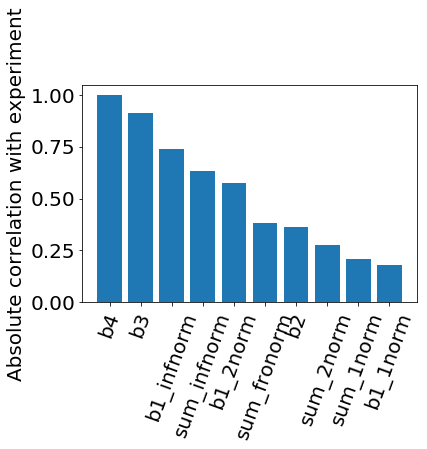

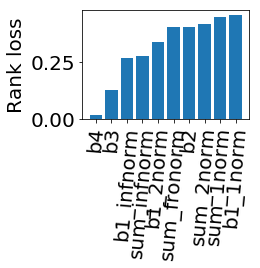

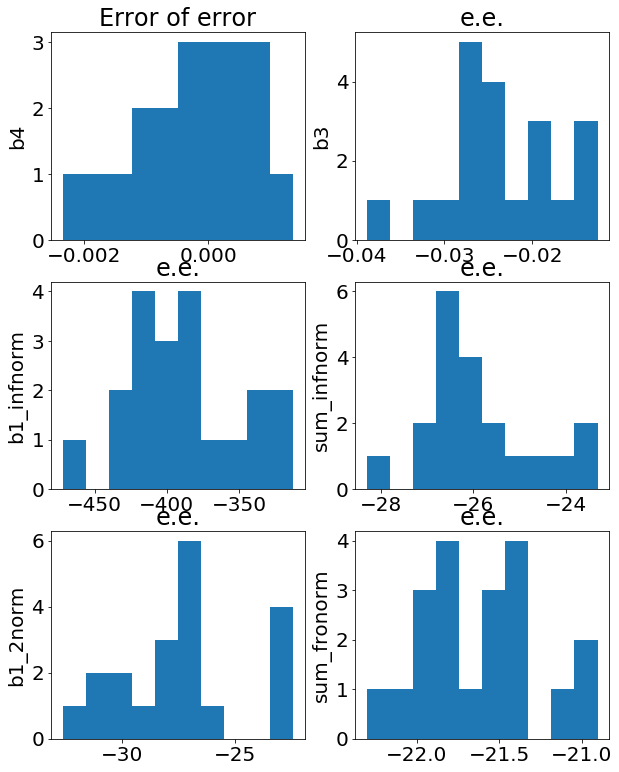

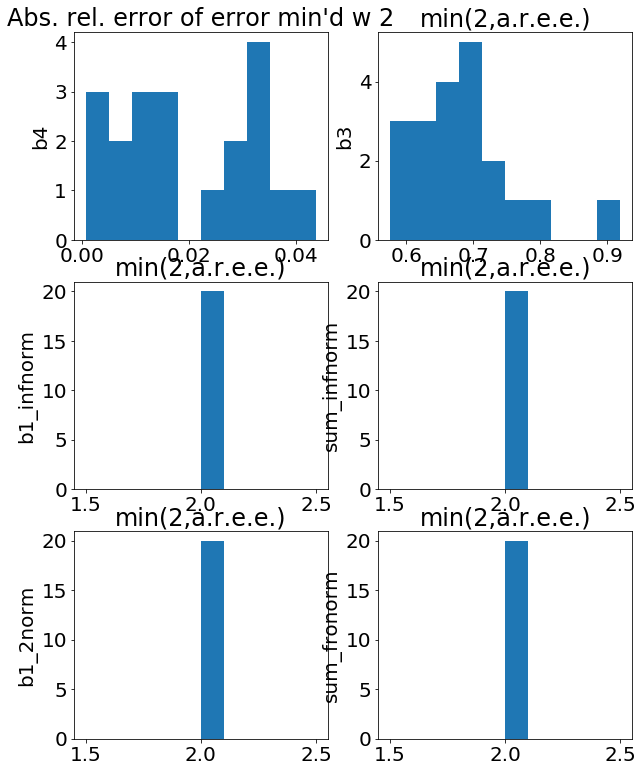

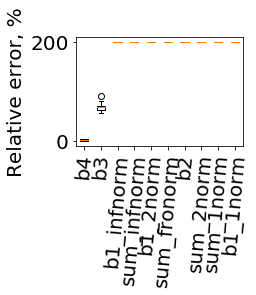

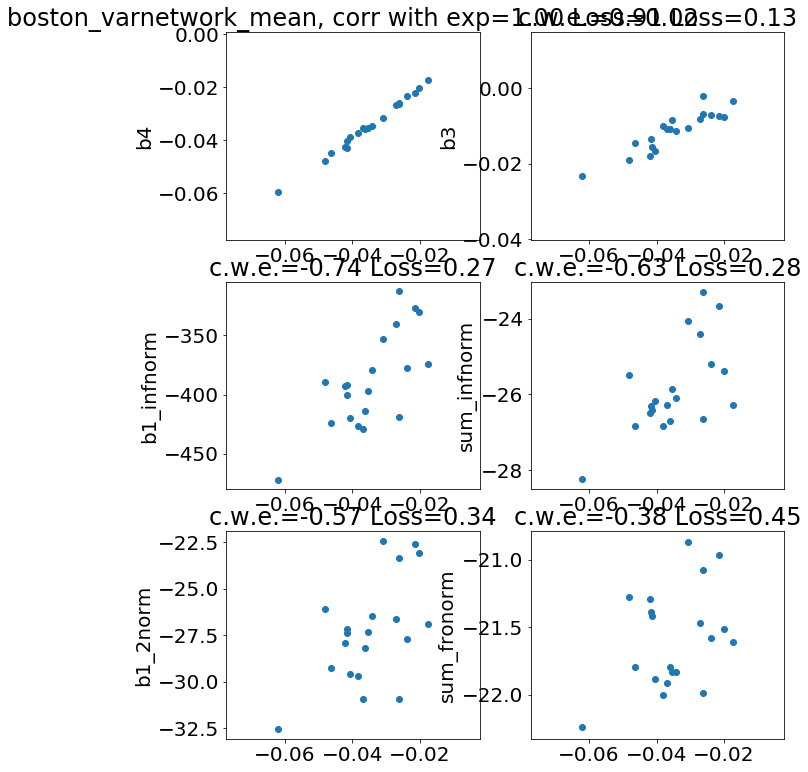

,bound,corr,rank_loss
0,b4,0.996975,0.015789
1,b3,0.913158,0.126316
2,b1_infnorm,-0.738251,0.268421
3,sum_infnorm,-0.632145,0.278947
4,b1_2norm,-0.574987,0.342105
5,sum_fronorm,-0.380096,0.452632
6,b2,-0.362913,0.405263
7,sum_2norm,-0.276136,0.405263
8,sum_1norm,-0.211161,0.421053
9,b1_1norm,-0.179057,0.457895


In [11]:
exp.process_scalar_output(exp.preprocess_scalar_input_scalar_output(results_mean), 'boston_varnetwork_mean')

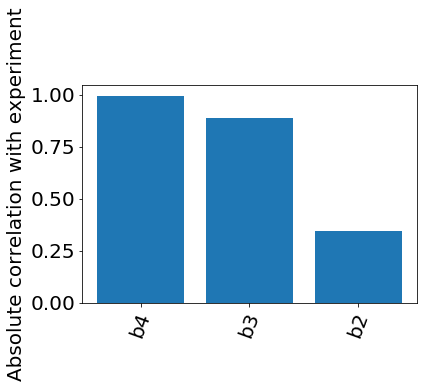

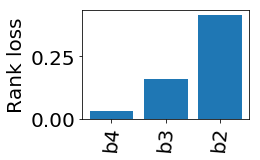

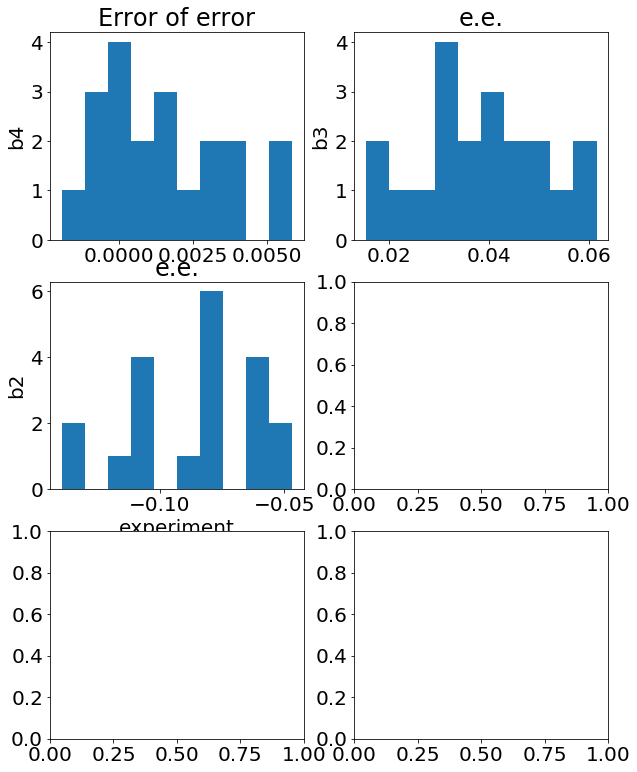

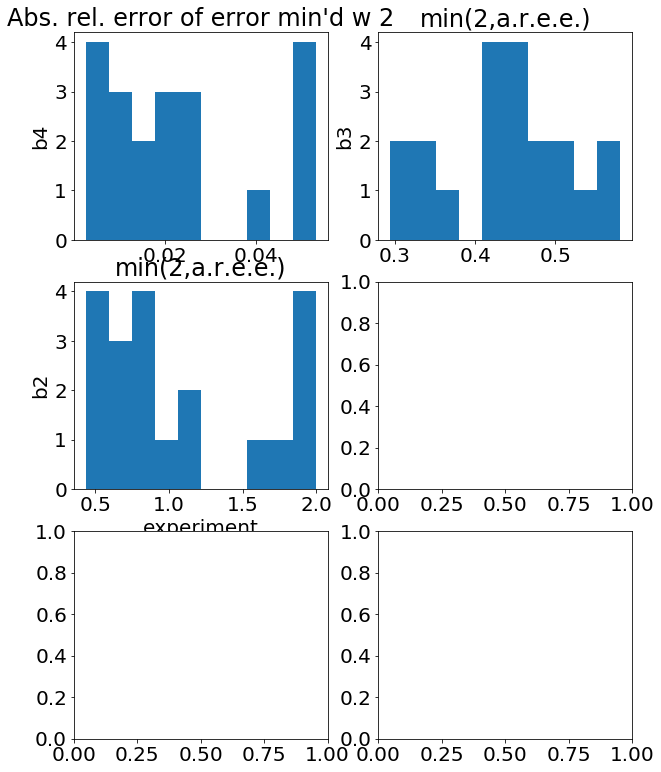

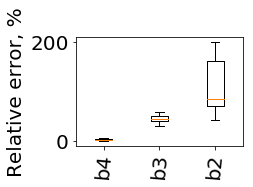

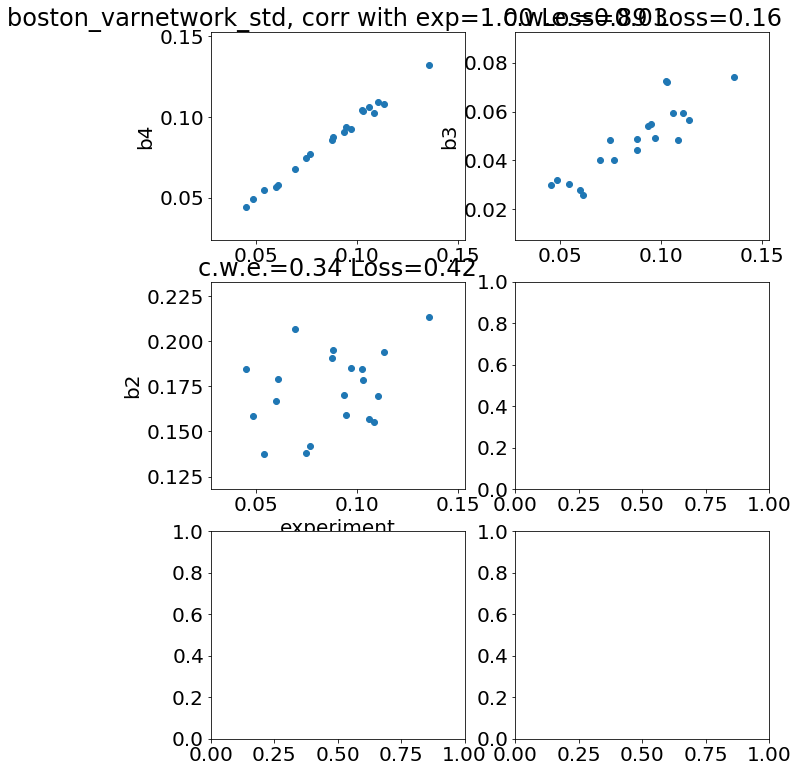

,bound,corr,rank_loss
0,b4,0.996142,0.031579
1,b3,0.887222,0.157895
2,b2,0.344504,0.415789


In [12]:
exp.process_scalar_output(exp.preprocess_scalar_input_scalar_output(results_std), 'boston_varnetwork_std')